<a href="https://colab.research.google.com/github/naashonomics/2022_prep/blob/main/vmware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pytest

49. Group Anagrams

Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
Example 2:

Input: strs = [""]
Output: [[""]]
Example 3:

Input: strs = ["a"]
Output: [["a"]]
 

Constraints:

1 <= strs.length <= 104
0 <= strs[i].length <= 100
strs[i] consists of lowercase English letters.

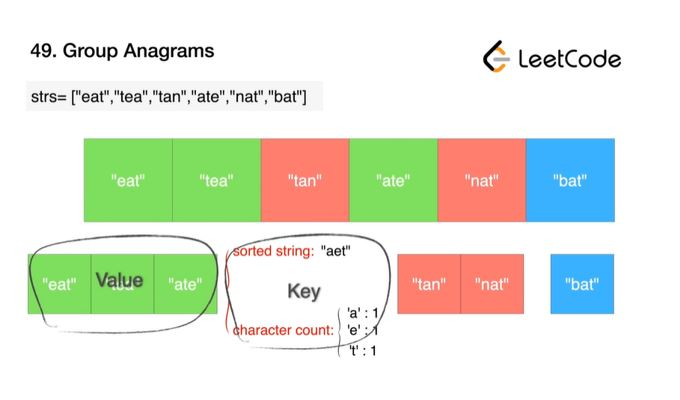
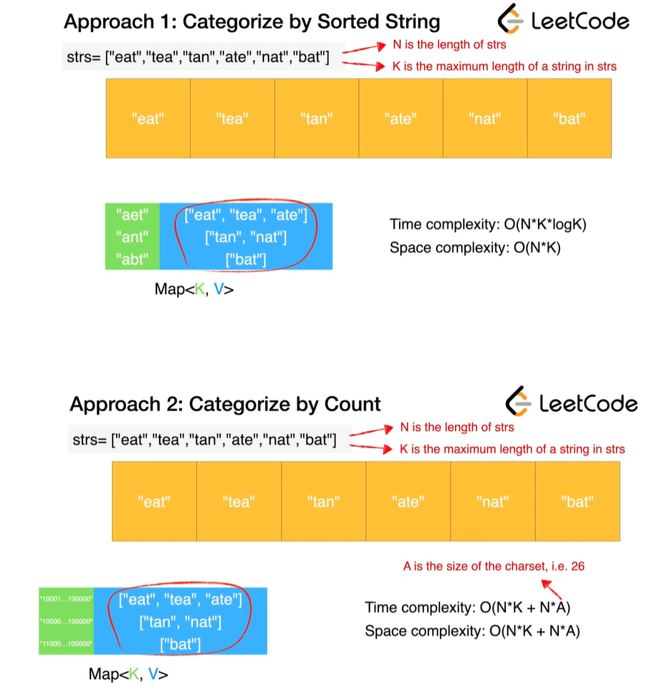

#Hash Table #string #Sorting

In [13]:
from collections import defaultdict
class Solution(object):
    def groupAnagrams(self, strs):
        """
        :type strs: List[str]
        :rtype: List[List[str]]
        """
        ans=defaultdict(list)
        for s in strs:
            ans[tuple(sorted(s))].append(s)
        return ans.values()
        # TC O (N*K *LogK)
        # SC O (N*K)

class Solution1:
    def groupAnagrams(self,strs):
        ans = defaultdict(list)
        for s in strs:
            count = [0] * 26
            for c in s:
                count[ord(c) - ord('a')] += 1
            ans[tuple(count)].append(s)
        return ans.values()
        # TC O (N*K)
        # SC O (N*K)

s = Solution()
s1 = Solution1()
print(s1.groupAnagrams(["eat","tea","tan","ate","nat","bat"]))
def test_1():
  input1=["eat","tea","tan","ate","nat","bat"]
  assert set_equals(
    s.groupAnagrams(input1),
        [
          ["bat"],["eat","tea","ate"],["tan","nat"]
        ])
print(s.groupAnagrams(["eat","tea","tan","ate","nat","bat"]))


dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])


121. Best Time to Buy and Sell Stock 

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.
 

Constraints:

1 <= prices.length <= 105
0 <= prices[i] <= 104

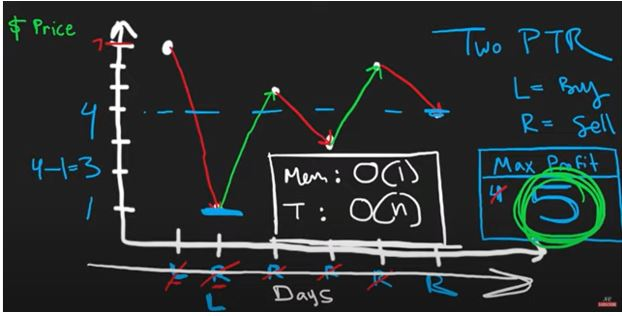

In [17]:
class Solution:
    def maxProfit(self, prices):
        l,r=0,1  # left =buy , right = sell
        maxP=0
        while r < len(prices):
            #profitable 
            if prices[l] < prices[r] :
                profit = prices[r] - prices[l]
                maxP=max(maxP,profit)
            else:
                l = r
            r += 1
        return maxP

s=Solution()
prices = [7,1,5,3,6,4]
print(s.maxProfit(prices)) #5 
prices = [7,6,4,3,1]
print(s.maxProfit(prices)) #0 

5
0


226. Invert Binary Tree 

Given the root of a binary tree, invert the tree, and return its root.

 

Example 1:
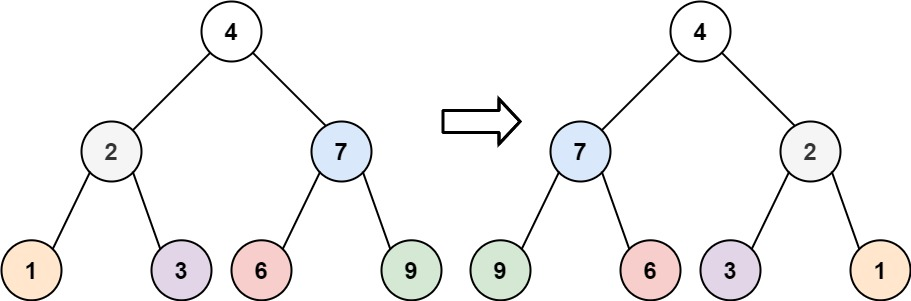

Input: root = [4,2,7,1,3,6,9]
Output: [4,7,2,9,6,3,1]
Example 2:
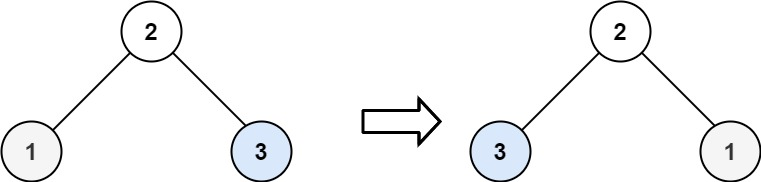

Input: root = [2,1,3]
Output: [2,3,1]
Example 3:

Input: root = []
Output: [] 

In [3]:

class Solution:
    def invertTree(self, root):
        if root is None:
            return None
        root.left , root.right = self.invertTree(root.right),self.invertTree(root.left)
        
        return root 
 

1046. Last Stone Weight 

You are given an array of integers stones where stones[i] is the weight of the ith stone.

We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. The result of this smash is:

If x == y, both stones are destroyed, and
If x != y, the stone of weight x is destroyed, and the stone of weight y has new weight y - x.
At the end of the game, there is at most one stone left.

Return the smallest possible weight of the left stone. If there are no stones left, return 0.

 

Example 1:

Input: stones = [2,7,4,1,8,1]
Output: 1
Explanation: 
We combine 7 and 8 to get 1 so the array converts to [2,4,1,1,1] then,
we combine 2 and 4 to get 2 so the array converts to [2,1,1,1] then,
we combine 2 and 1 to get 1 so the array converts to [1,1,1] then,
we combine 1 and 1 to get 0 so the array converts to [1] then that's the value of the last stone.
Example 2:

Input: stones = [1]
Output: 1

Constraints:

1 <= stones.length <= 30
1 <= stones[i] <= 1000

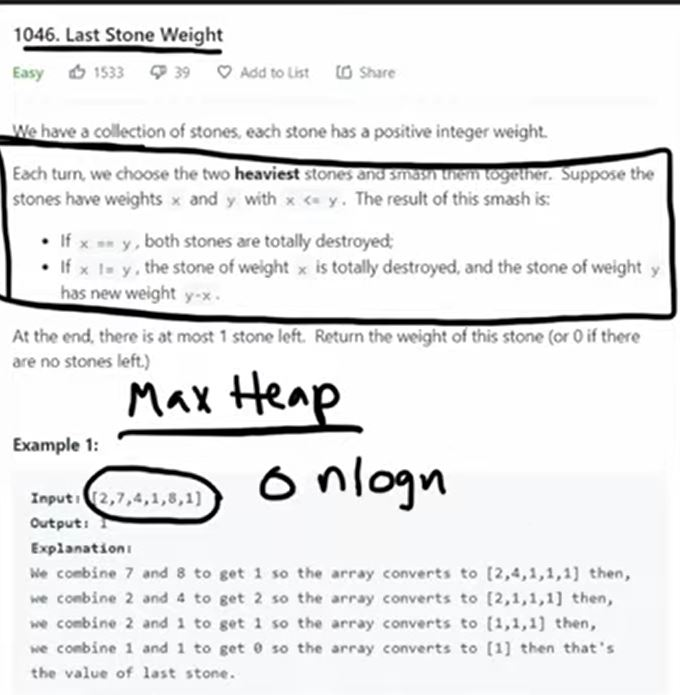

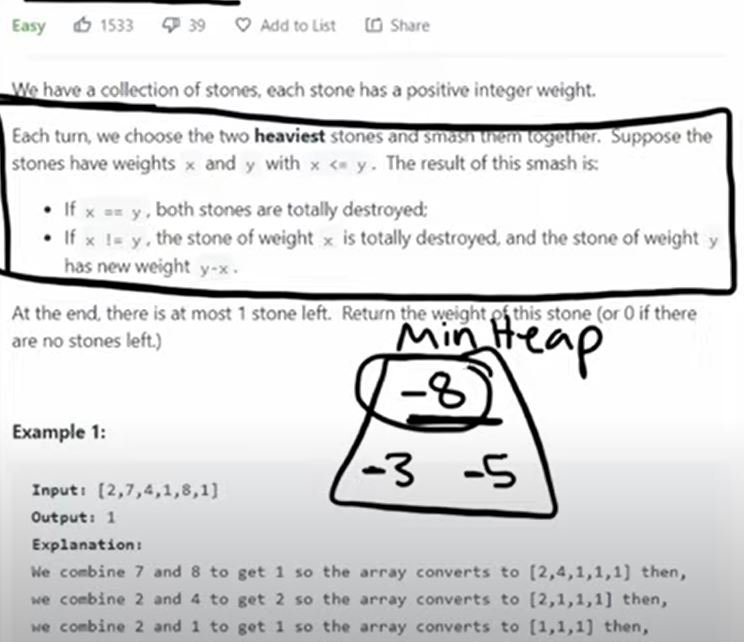

In [ ]:
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones = [-s for s in stones]    
        heapq.heapify(stones)
        
        while len(stones) > 1:
            first=heapq.heappop(stones)
            second=heapq.heappop(stones)
            if second > first :
                heapq.heappush(stones,first-second)
        
        
        if len(stones)==0:
            stones.append(0)
        return abs(stones[0])
#TC nlogn

252. Meeting Rooms

Given an array of meeting time intervals where intervals[i] = [starti, endi],

 determine if a person could attend all meetings.

 

Example 1:

Input: intervals = [[0,30],[5,10],[15,20]]

Output: false


Example 2:

Input: intervals = [[7,10],[2,4]]

Output: true
 

Constraints:

0 <= intervals.length <= 104

intervals[i].length == 2

0 <= starti < endi <= 106

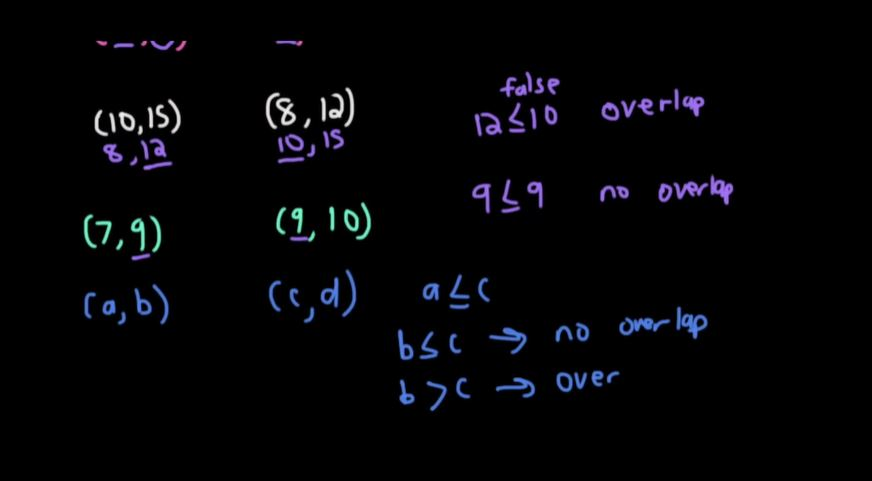

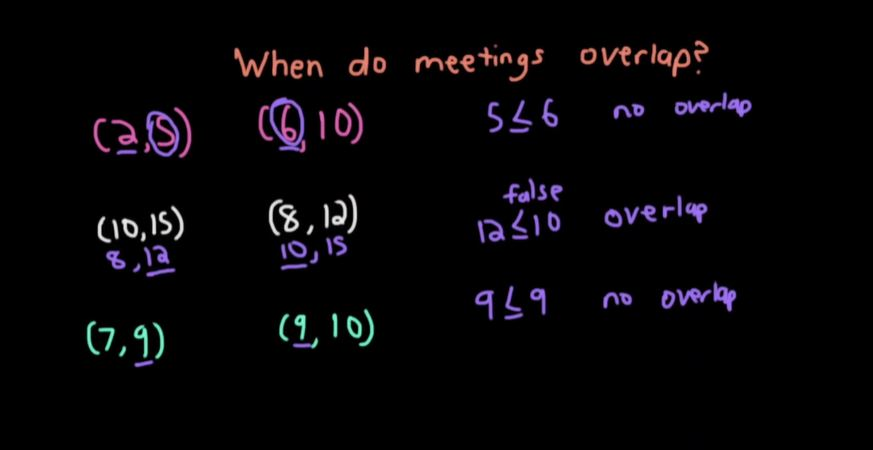

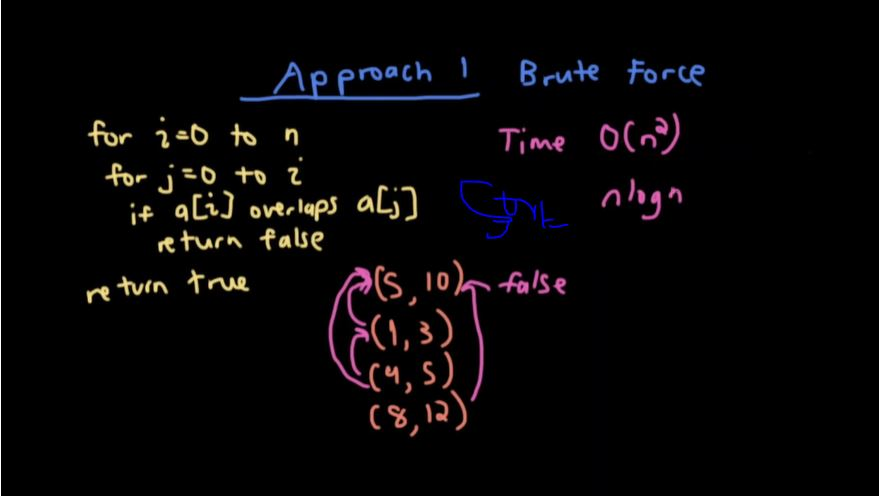 


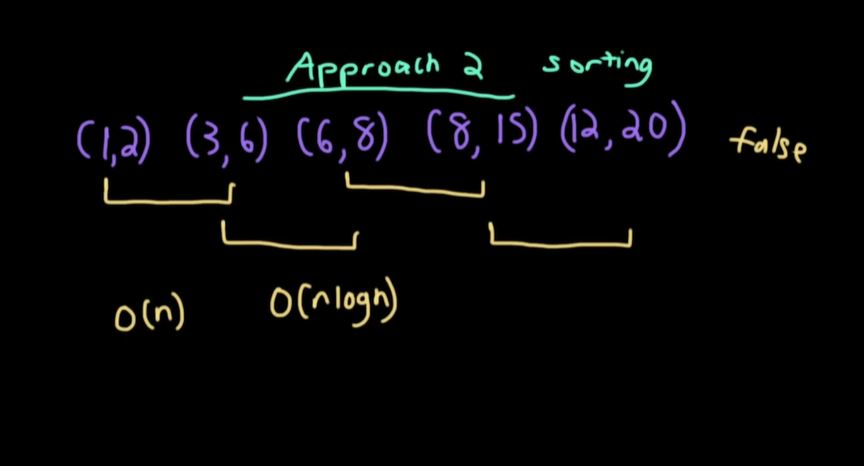

In [ ]:
class Solution:
    def canAttendMeetings(self, intervals: List[List[int]]) -> bool:
        intervals.sort()
        for i in range(len(intervals)-1):
            if intervals[i][1] >  intervals[i+1][0]:
                return False
        return True